In [1]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sys

In [29]:
matrixMalEX="data_GG.csv"
matrixMal="data_GM.csv"
matrixIt="data_L.csv"
n_qty=2 #CAMBIAR SEGUN LA CANTIDAD DE NODOS USADOS
repet = 3 * 2 #CAMBIAR EL PRIMER NUMERO SEGUN NUMERO DE EJECUCIONES POR CONFIG

p_value = 0.05
values = [2, 4, 8, 16, 32]
dist_names = ['null', 'BestFit', 'WorstFit']

In [3]:
def speedUp(arr, seq, df):
    numP = df.loc[arr.index[0]].NP
    return seq[( seq.NP == numP )]['EX'] / arr.mean()

In [4]:
dfG = pd.read_csv( matrixMalEX )

dfG = dfG.drop(columns=dfG.columns[0])
dfG['S'] = dfG['N']
dfG['N'] = dfG['S'] + dfG['%Async']
dfG['%Async'] = (dfG['%Async'] / dfG['N']) * 100

if(n_qty == 1):
    group = dfG.groupby(['%Async', 'Groups'])['TE']
else:        
    group = dfG.groupby(['Dist', '%Async', 'Groups'])['TE']

#group
grouped_aggG = group.agg(['mean'])
grouped_aggG.rename(columns={'mean':'TE',}, inplace=True)

In [ ]:
from natsort import index_natsorted
grouped_aggG.sort_values(
   by="Groups",
   key=lambda x: np.argsort(index_natsorted(df["Groups"]))
)
grouped_aggG

In [5]:
dfM = pd.read_csv( matrixMal )
dfM = dfM.drop(columns=dfM.columns[0])

dfM['S'] = dfM['N']
dfM['N'] = dfM['S'] + dfM['%Async']
dfM["TR"] = dfM["TC"] + dfM["TS"] + dfM["TA"]
dfM['%Async'] = (dfM['%Async'] / dfM['N']) * 100

if(n_qty == 1):
    groupM = dfM.groupby(['%Async','NP', 'NS'])['TC', 'TS', 'TA', 'TR']
else:
    groupM = dfM.groupby(['Dist', '%Async','NP', 'NS'])['TC', 'TS', 'TA', 'TR']

#group
grouped_aggM = groupM.agg(['mean'])
grouped_aggM.columns = grouped_aggM.columns.get_level_values(0)

In [6]:
dfL = pd.read_csv( matrixIt )
dfL = dfL.drop(columns=dfL.columns[0])

dfL['S'] = dfL['N']
dfL['N'] = dfL['S'] + dfL['%Async']
dfL['%Async'] = (dfL['%Async'] / dfL['N']) * 100

if(n_qty == 1):
    groupL = dfL[dfL['NS'] != 0].groupby(['Tt', '%Async', 'NP', 'NS'])['Ti', 'To']
else:
    groupL = dfL[dfL['NS'] != 0].groupby(['Tt', 'Dist', '%Async', 'NP', 'NS'])['Ti', 'To']

#group
grouped_aggL = groupL.agg(['mean', 'count'])
grouped_aggL.columns = grouped_aggL.columns.get_level_values(0)
grouped_aggL.set_axis(['Ti', 'Iters', 'To', 'Iters2'], axis='columns')

grouped_aggL['Iters'] = np.ceil(grouped_aggL['Iters']/6) # TODO Cambiar a repeticiones realizadas
grouped_aggL['Iters2'] = np.ceil(grouped_aggL['Iters2']/6)

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  app.launch_new_instance()


In [7]:
grouped_aggL.to_excel("resultL.xlsx") 
grouped_aggM.to_excel("resultM.xlsx") 
grouped_aggG.to_excel("resultG.xlsx") 

In [8]:
dfG

N  %Async Groups Dist  Matrix  Time  Iters         TE  \
0    1000000000     0.0   8,32  2,2  100000   0.1   1000  31.525710   
1    1000000000     0.0   8,32  2,2  100000   0.1   1000  33.315857   
2    1000000000     0.0   8,32  2,2  100000   0.1   1000  33.347537   
3    1000000000    75.0   4,32  1,1  100000   0.1   1000  57.219027   
4    1000000000    75.0   4,32  1,1  100000   0.1   1000  55.469166   
..          ...     ...    ...  ...     ...   ...    ...        ...   
595  1000000000    50.0    4,8  2,2  100000   0.1   1000  73.771357   
596  1000000000    50.0    4,8  2,2  100000   0.1   1000  75.557508   
597  1000000000    50.0   16,8  1,1  100000   0.1   1000  35.949913   
598  1000000000    50.0   16,8  1,1  100000   0.1   1000  37.900348   
599  1000000000    50.0   16,8  1,1  100000   0.1   1000  36.012772   

              S  
0    1000000000  
1    1000000000  
2    1000000000  
3     250000000  
4     250000000  
..          ...  
595   500000000  
596   500000000  
597   500000000  
598   500000000  
599   500000000  

[600 rows x 9 columns]

In [9]:
grouped_aggG

TE
Dist %Async Groups            
1,1  0.0    16,2    112.087769
            16,32    18.394706
            16,4     61.887052
            16,8     37.986463
            2,16    113.187865
...                        ...
2,2  100.0  4,8      74.864688
            8,16     37.999586
            8,2     123.584176
            8,32     31.730297
            8,4      74.052463

[200 rows x 1 columns]

In [10]:
dfM

N  %Async  NP  NS Dist  Matrix  Time  Iters        TC        TS  \
0    1000000000     0.0   8  32  2,2  100000   0.1   1000  1.341434  0.695848   
1    1000000000     0.0   8  32  2,2  100000   0.1   1000  1.405911  0.639849   
2    1000000000     0.0   8  32  2,2  100000   0.1   1000  1.346017  0.747863   
3    1000000000    75.0   4  32  1,1  100000   0.1   1000  0.688062  0.064900   
4    1000000000    75.0   4  32  1,1  100000   0.1   1000  0.702200  0.068039   
..          ...     ...  ..  ..  ...     ...   ...    ...       ...       ...   
595  1000000000    50.0   4   8  2,2  100000   0.1   1000  0.390444  0.142287   
596  1000000000    50.0   4   8  2,2  100000   0.1   1000  0.351690  0.154699   
597  1000000000    50.0  16   8  1,1  100000   0.1   1000  0.337472  0.081077   
598  1000000000    50.0  16   8  1,1  100000   0.1   1000  0.351262  0.103176   
599  1000000000    50.0  16   8  1,1  100000   0.1   1000  0.349151  0.094121   

           TA           S        TR  
0    0.000000  1000000000  2.037282  
1    0.000000  1000000000  2.045760  
2    0.000000  1000000000  2.093880  
3    0.364941   250000000  1.117903  
4    0.412072   250000000  1.182311  
..        ...         ...       ...  
595  0.338576   500000000  0.871307  
596  0.354917   500000000  0.861306  
597  0.243481   500000000  0.662030  
598  0.261565   500000000  0.716003  
599  0.221750   500000000  0.665022  

[600 rows x 13 columns]

In [11]:
grouped_aggM

TC        TS        TA        TR
Dist %Async NP NS                                        
1,1  0.0    2  4   0.220380  0.314893  0.000000  0.535273
               8   0.248143  0.375003  0.000000  0.623146
               16  0.339042  0.486650  0.000000  0.825692
               32  0.743840  0.506385  0.000000  1.250225
            4  2   0.197858  0.311136  0.000000  0.508994
...                     ...       ...       ...       ...
2,2  100.0  16 32  1.358891  0.000000  1.419016  2.777907
            32 2   0.591882  0.000000  2.477300  3.069183
               4   0.804965  0.000000  1.729638  2.534603
               8   0.935128  0.000000  1.520682  2.455810
               16  1.221248  0.000000  1.541904  2.763152

[200 rows x 4 columns]

In [12]:
dfL

N  %Async  NP  N_par  NS  Dist  Matrix  Time  Iters  \
0        1000000000     0.0  32      8   0     2  100000   0.1   1000   
1        1000000000     0.0  32      8   0     2  100000   0.1   1000   
2        1000000000     0.0  32      8   0     2  100000   0.1   1000   
3        1000000000     0.0  32      8   0     2  100000   0.1   1000   
4        1000000000     0.0  32      8   0     2  100000   0.1   1000   
...             ...     ...  ..    ...  ..   ...     ...   ...    ...   
1199995  1000000000    50.0   8     16   0     1  100000   0.1   1000   
1199996  1000000000    50.0   8     16   0     1  100000   0.1   1000   
1199997  1000000000    50.0   8     16   0     1  100000   0.1   1000   
1199998  1000000000    50.0   8     16   0     1  100000   0.1   1000   
1199999  1000000000    50.0   8     16   0     1  100000   0.1   1000   

               Ti   Tt    To           S  
0        0.005463  0.0   6.0  1000000000  
1        0.005350  0.0   6.0  1000000000  
2        0.005355  0.0   6.0  1000000000  
3        0.005354  0.0   6.0  1000000000  
4        0.005352  0.0   6.0  1000000000  
...           ...  ...   ...         ...  
1199995  0.024075  0.0  27.0   500000000  
1199996  0.024076  0.0  27.0   500000000  
1199997  0.024076  0.0  27.0   500000000  
1199998  0.024411  0.0  27.0   500000000  
1199999  0.024075  0.0  27.0   500000000  

[1200000 rows x 13 columns]

In [13]:
grouped_aggL

Ti  Iters          To  Iters2
Tt  Dist %Async NP NS                                     
0.0 1    0.0    2  4   0.099861  500.0  112.000000   500.0
                   8   0.099849  500.0  112.000000   500.0
                   16  0.099860  500.0  112.000000   500.0
                   32  0.099853  500.0  112.000000   500.0
                4  2   0.049642  500.0   55.666667   500.0
...                         ...    ...         ...     ...
1.0 2    100.0  16 32  0.034899   21.0   14.000000    21.0
                32 2   0.012084  101.0    7.000000   101.0
                   4   0.015599   54.0    7.000000    54.0
                   8   0.012685   54.0    7.000000    54.0
                   16  0.015421   44.0    7.000000    44.0

[360 rows x 4 columns]

In [26]:
print("TIEMPO EJECUCCION")
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            if numP != numC:
                group = str(numP) + "," + str(numC)
                v1 = dfG[(dfG["%Async"] == 0.0)][(dfG.Groups == group)][(dfG["Dist"] == dist_v)]['TE']
                v2 = dfG[(dfG["%Async"] == 100.0)][(dfG.Groups == group)][(dfG["Dist"] == dist_v)]['TE']
                res = stats.ttest_ind(v1, v2)
                diff = grouped_aggG['TE'].loc[(dist_v, 0.0, group)] - grouped_aggG['TE'].loc[(dist_v, 100.0, group)]
                if diff > 0:
                    mejor = "Asíncrono"
                else:
                    mejor = "Síncrono"
                    
                if res[1] < p_value:
                    print("EX numC=", numC, "p =", round(res[1],3), "Diff =", abs(round(diff,3)), mejor)

TIEMPO EJECUCCION
Distribución BestFit -------------------------
Para  2  padres
EX numC= 4 p = 0.039 Diff = 0.09 Asíncrono
Para  4  padres
Para  8  padres
EX numC= 4 p = 0.0 Diff = 1.411 Síncrono
Para  16  padres
EX numC= 2 p = 0.014 Diff = 3.662 Asíncrono
Para  32  padres
EX numC= 4 p = 0.002 Diff = 4.589 Asíncrono
Distribución WorstFit -------------------------
Para  2  padres
Para  4  padres
EX numC= 16 p = 0.046 Diff = 0.304 Síncrono
EX numC= 32 p = 0.012 Diff = 0.542 Síncrono
Para  8  padres


/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


Para  16  padres
EX numC= 2 p = 0.023 Diff = 6.349 Asíncrono
EX numC= 4 p = 0.0 Diff = 1.799 Asíncrono
EX numC= 8 p = 0.046 Diff = 0.261 Asíncrono
Para  32  padres
EX numC= 2 p = 0.01 Diff = 18.514 Asíncrono
EX numC= 4 p = 0.0 Diff = 4.454 Asíncrono
EX numC= 8 p = 0.003 Diff = 1.92 Asíncrono


In [19]:
print("TIEMPO MALLEABILITY")
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            if numP != numC:
                v1 = dfM[(dfM["%Async"] == 0.0)][(dfM.NP == numP)][(dfM.NS == numC)][(dfM["Dist"] == dist_v)]['TS']
                v2 = dfM[(dfM["%Async"] == 100.0)][(dfM.NP == numP)][(dfM.NS == numC)][(dfM["Dist"] == dist_v)]['TA']
                res = stats.ttest_ind(v1, v2)
                diff = grouped_aggM['TS'].loc[(dist_v, 0.0, numP, numC)] - grouped_aggM['TA'].loc[(dist_v, 100.0, numP, numC)]
                if diff > 0:
                    mejor = "Asíncrono"
                else:
                    mejor = "Síncrono"
                if res[1] < p_value:
                    print("TR numC=", numC, "p =", round(res[1],3), "Diff =", abs(round(diff,3)), mejor)

TIEMPO MALLEABILITY
Distribución 1 -------------------------
Para  2  padres
TR numC= 8 p = 0.0 Diff = 0.029 Síncrono
Para  4  padres
TR numC= 8 p = 0.006 Diff = 0.043 Síncrono
TR numC= 32 p = 0.025 Diff = 0.052 Síncrono
Para  8  padres
TR numC= 4 p = 0.016 Diff = 0.022 Asíncrono
TR numC= 16 p = 0.009 Diff = 0.031 Síncrono
TR numC= 32 p = 0.0 Diff = 0.483 Síncrono
Para  16  padres
TR numC= 8 p = 0.002 Diff = 0.072 Síncrono
TR numC= 32 p = 0.019 Diff = 0.549 Síncrono
Para  32  padres
TR numC= 4 p = 0.002 Diff = 0.981 Síncrono
TR numC= 8 p = 0.001 Diff = 0.972 Síncrono
TR numC= 16 p = 0.001 Diff = 0.831 Síncrono
Distribución 2 -------------------------
Para  2  padres
TR numC= 4 p = 0.0 Diff = 0.069 Síncrono


/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


TR numC= 8 p = 0.029 Diff = 0.035 Síncrono
Para  4  padres
TR numC= 8 p = 0.02 Diff = 0.031 Síncrono
TR numC= 32 p = 0.009 Diff = 0.601 Síncrono
Para  8  padres
TR numC= 16 p = 0.011 Diff = 0.729 Síncrono
TR numC= 32 p = 0.018 Diff = 0.423 Síncrono
Para  16  padres
TR numC= 4 p = 0.001 Diff = 0.884 Síncrono
TR numC= 32 p = 0.021 Diff = 0.36 Síncrono
Para  32  padres
TR numC= 2 p = 0.029 Diff = 1.548 Síncrono
TR numC= 4 p = 0.008 Diff = 0.84 Síncrono
TR numC= 8 p = 0.011 Diff = 0.726 Síncrono
TR numC= 16 p = 0.004 Diff = 0.606 Síncrono


In [28]:
print("TIEMPO Iters")
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            if numP != numC:
                #exp = dfL[(dfL["Tt"] == 0)][(dfL["Dist"] == 1)][(dfL["%Async"] == 0.0)][(dfL.NP == numP)][(dfL.NS == numC)]
                #TimeOp = exp['Ti'] 
                #print(TimeOp)
                v1 = dfL[(dfL["Tt"] == 0)][(dfL["Dist"] == dist)][(dfL["%Async"] == 100.0)][(dfL.NP == numP)][(dfL.NS == numC)]['Ti']
                v2 = dfL[(dfL["Tt"] == 1)][(dfL["Dist"] == dist)][(dfL["%Async"] == 100.0)][(dfL.NP == numP)][(dfL.NS == numC)]['Ti']
                res = stats.ttest_ind(v1, v2, equal_var = False)
                diff = grouped_aggL['Ti'].loc[(0, dist, 0.0, numP, numC)] - grouped_aggL['Ti'].loc[(1, dist, 100.0, numP, numC)]
                if diff > 0:
                    mejor = "Asíncrono"
                else:
                    mejor = "Síncrono"
                if res[1] < p_value:
                    #and abs(diff) > grouped_aggL['Ti'].loc[(0, dist, 0.0, numP, numC)]
                    print("Ti numC=", numC, "p =", round(res[1],3), "Diff =", abs(round(diff,4)), mejor)

TIEMPO Iters
Distribución BestFit -------------------------
Para  2  padres
Ti numC= 4 p = 0.035 Diff = 0.0001 Síncrono


/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Ti numC= 8 p = 0.025 Diff = 0.0001 Síncrono
Ti numC= 16 p = 0.002 Diff = 0.0001 Síncrono
Ti numC= 32 p = 0.007 Diff = 0.0001 Síncrono
Para  4  padres
Ti numC= 16 p = 0.0 Diff = 0.0006 Síncrono
Para  8  padres
Ti numC= 4 p = 0.0 Diff = 0.0009 Síncrono
Ti numC= 32 p = 0.007 Diff = 0.0029 Síncrono
Para  16  padres
Ti numC= 32 p = 0.0 Diff = 0.0097 Síncrono
Para  32  padres
Ti numC= 2 p = 0.0 Diff = 0.0029 Síncrono
Ti numC= 4 p = 0.0 Diff = 0.0056 Síncrono
Ti numC= 8 p = 0.0 Diff = 0.0055 Síncrono
Ti numC= 16 p = 0.0 Diff = 0.0053 Síncrono
Distribución WorstFit -------------------------
Para  2  padres
Ti numC= 32 p = 0.024 Diff = 0.0256 Síncrono
Para  4  padres
Ti numC= 16 p = 0.0 Diff = 0.0243 Síncrono
Ti numC= 32 p = 0.0 Diff = 0.0343 Síncrono
Para  8  padres
Ti numC= 4 p = 0.036 Diff = 0.0044 Síncrono
Ti numC= 16 p = 0.0 Diff = 0.008 Síncrono
Ti numC= 32 p = 0.0 Diff = 0.0225 Síncrono
Para  16  padres
Ti numC= 2 p = 0.0 Diff = 0.0067 Síncrono
Ti numC= 4 p = 0.0 Diff = 0.0092 Síncrono
T

In [22]:
iters = dfM['Iters'].mean()
resultados = [0,0]
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            if numP != numC:
                Titer = dfL[(dfL["Tt"] == 0)][(dfL["Dist"] == dist)][(dfL.NP == numC)]['Ti'].mean() #Tiempo por iteracion
                i=0
                for adr in [0.0, 100.0]:
                
                    auxExp = dfM[(dfM["Dist"] == dist_v)][(dfM["%Async"] == adr)][(dfM.NP == numP)][(dfM.NS == numC)]
                    Tr = auxExp['TS'].mean() + auxExp['TA'].mean() #Tiempo de redistribucion
                    M_it = dfL[(dfL["Tt"] == 1)][(dfL["Dist"] == dist)][(dfL["%Async"] == adr)][(dfL.NP == numP)][(dfL.NS == numC)]['Ti'].count()/3 #Iteraciones asincronas
                    #No se presupone una diferencia temporal entre iteraciones sincronas y asincronas
                    if(M_it > iters):
                        M_it = iters
                    resultados[i] = (iters - M_it) * Titer + Tr
                    i+=1
                    #print(M_it)
                    #print(Titer)
                    #print((iters - M_it) * Titer)
                    #print(Tr)
                    #print("End")
                
                if resultados[0] > resultados[1]:
                    mejor = "Asíncrono"
                else:
                    mejor = "Síncrono"
                diff = abs(round(resultados[0] - resultados[1], 3))
                print("NC="+ str(numC) + " Es mejor " + mejor + " con una diff de "+  str(diff))
                #TODO Comprobar

Distribución BestFit -------------------------
Para  2  padres
NC=4 Es mejor Asíncrono con una diff de 0.123


/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


NC=8 Es mejor Asíncrono con una diff de 0.07
NC=16 Es mejor Asíncrono con una diff de 0.046
NC=32 Es mejor Asíncrono con una diff de 0.014
Para  4  padres
NC=2 Es mejor Asíncrono con una diff de 0.645
NC=8 Es mejor Asíncrono con una diff de 0.13
NC=16 Es mejor Asíncrono con una diff de 0.052
NC=32 Es mejor Síncrono con una diff de 0.005
Para  8  padres
NC=2 Es mejor Asíncrono con una diff de 1.523
NC=4 Es mejor Asíncrono con una diff de 0.354
NC=16 Es mejor Asíncrono con una diff de 0.066
NC=32 Es mejor Síncrono con una diff de 0.327
Para  16  padres
NC=2 Es mejor Asíncrono con una diff de 3.676
NC=4 Es mejor Asíncrono con una diff de 1.235
NC=8 Es mejor Asíncrono con una diff de 0.406
NC=32 Es mejor Síncrono con una diff de 0.304
Para  32  padres
NC=2 Es mejor Asíncrono con una diff de 16.171
NC=4 Es mejor Asíncrono con una diff de 4.551
NC=8 Es mejor Asíncrono con una diff de 1.599
NC=16 Es mejor Asíncrono con una diff de 0.12
Distribución WorstFit -------------------------
Para  2  

In [48]:
grouped_aggL

Ti  Iters          To  Iters2
Tt  Dist %Async NP NS                                     
0.0 1    0.0    2  4   0.099861  500.0  112.000000   500.0
                   8   0.099849  500.0  112.000000   500.0
                   16  0.099860  500.0  112.000000   500.0
                   32  0.099853  500.0  112.000000   500.0
                4  2   0.049642  500.0   55.666667   500.0
...                         ...    ...         ...     ...
1.0 2    100.0  16 32  0.034899   21.0   14.000000    21.0
                32 2   0.012084  101.0    7.000000   101.0
                   4   0.015599   54.0    7.000000    54.0
                   8   0.012685   54.0    7.000000    54.0
                   16  0.015421   44.0    7.000000    44.0

[360 rows x 4 columns]

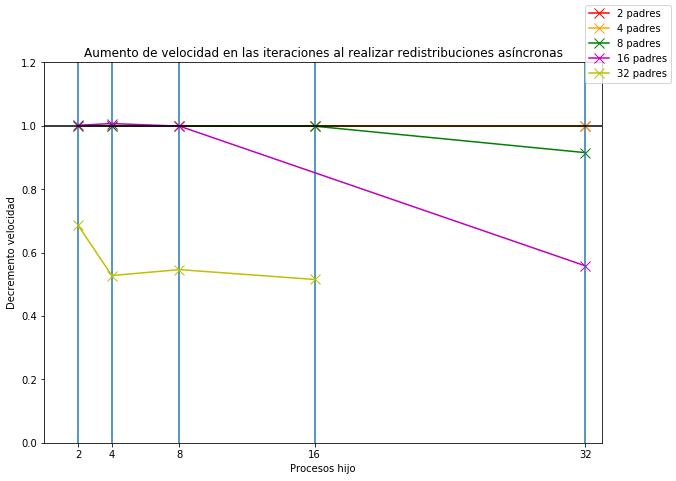

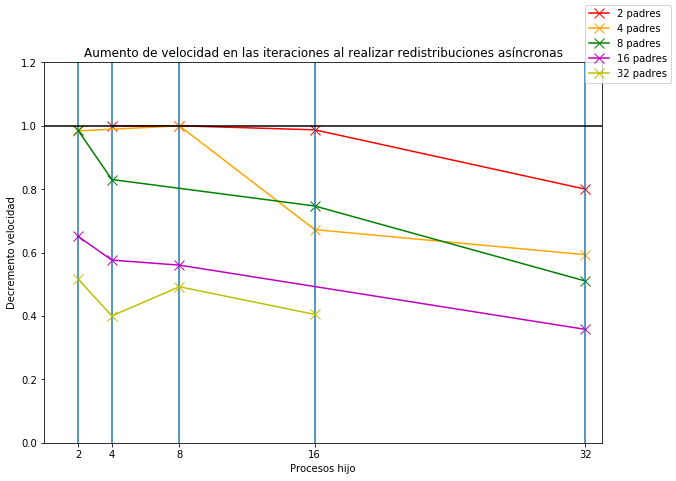

In [88]:
for dist in [1,2]:
    v1 = grouped_aggL.loc[(0,dist,100.0,slice(None))]
    v2 = grouped_aggL.loc[(1,dist,100.0,slice(None))]
    aux_aggL = v1['Ti'].values / v2['Ti'].values

    colors = ['r', 'orange', 'g', 'm', 'y']
    markers = ['+', 'x', '1', '2', 'X']

    f=plt.figure(figsize=(10, 7))
    ax1 = f.add_subplot(111)
    plt.xlim(0, max(values)+1)
    plt.ylim(0, 1.2)
    plt.xticks(values)
    ax1.set_ylabel('Decremento velocidad')
    ax1.set_xlabel('Procesos hijo')
    ax1.set_title("Aumento de velocidad en las iteraciones al realizar redistribuciones asíncronas")


    for i in range(len(values)):
        numP = values[i]
        c = colors[i]
    
        mini = i * (len(values)-1)
        maxi = (i+1) * (len(values)-1)
        array_values = aux_aggL[mini:maxi]
        indexes = np.arange(len(values)-1)
        aux_j=0
        for j in range(len(values)):
            if(values[j] != numP):
                indexes[aux_j] = values[j]
                aux_j+=1
    
        x = indexes
        y = array_values
        label = str(numP) + ' padres'
        ax1.axvline(numP)
        plt.plot(x, y, color=colors[i], label=label, marker=markers[1], markersize=10)
    
    ax1.axhline(1, color='k')
    f.legend()
    #f.tight_layout()
    f.savefig("Images/"+"Iters"+ dist_names[dist] +"_SpeedUp", format="png")
